In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Image 

In [2]:
def draw_likelihood(observations, mu, sigma):
    plt.ylim(-0.02, 1)
    x_locs  = np.linspace(-10, 10, 500)
    plt.plot(x_locs, stats.norm.pdf(x_locs, loc=mu, scale=sigma), label = "inference")
    
    for obs in observations:
        plt.axvline(x=obs, ymin=0, ymax=stats.norm.pdf(obs, loc=mu, scale=sigma)+0.01, c="g")
    plt.axvline(x=obs, ymin=0, ymax=stats.norm.pdf(obs, loc=mu, scale=sigma)+0.01, c="g", label="probabilities") 
    plt.scatter(x=observations, y=[0 for _ in range(len(observations))], c="r", marker="o", label="obsevations")
    plt.legend()
    plt.grid()
    plt.title("mean={} sigma={}".format(str(mu), str(sigma)))
    plt.show()

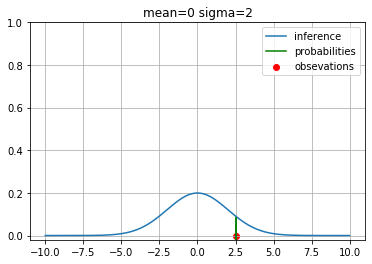

In [4]:
draw_likelihood([2.5], mu=0, sigma=2)

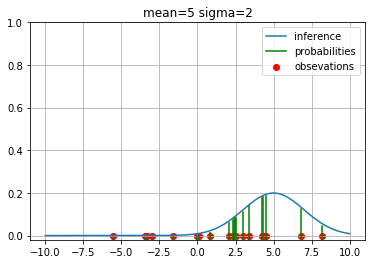

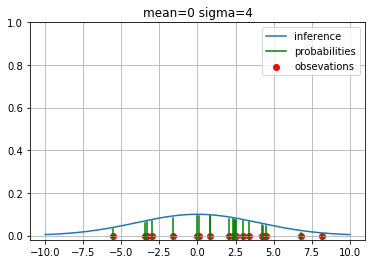

In [5]:
obs_mu, obs_sigma = 0, 4
observations = np.random.normal(obs_mu, obs_sigma, 20)
draw_likelihood(observations, mu=5, sigma=2)
draw_likelihood(observations, mu=0, sigma=4)

In [6]:
obs_mu, obs_sigma = 0, 4
observations = np.random.normal(obs_mu, obs_sigma, 200)

In [7]:
def likelihood(observations, infer_mu, infer_sigma):
    product_ = 1
    for obs in observations:
        product_ *= stats.norm.pdf(obs, loc=infer_mu, scale=infer_sigma)
    return product_

In [8]:
all_infer_mu = [i/10 for i in range(-5, 5)]
all_infer_sigma = [i/10 for i in range(35, 45)]

In [9]:
mle = []
for infer_mu in all_infer_mu:
    temp_lis = []
    for infer_sigma in all_infer_sigma:
        temp_lis.append(likelihood(observations, infer_mu, infer_sigma))
    mle.append(temp_lis)

In [11]:
data = [go.Surface(x=all_infer_mu, y=all_infer_sigma, z=mle)]
layout = go.Layout(title="Log Likelihood", scene={"xaxis": {'title': "mean"}, "yaxis": {"title": "sigma"},"zaxis": {"title": "likelihood"}})
fig = go.Figure(data=data, layout=layout)
iplot(fig)